In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
!pip install node2vec
!pip install fastnode2vec
#from node2vec import Node2Vec as n2v
from fastnode2vec import Graph, Node2Vec

sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
G= nx.read_gexf("/content/drive/MyDrive/Colab Notebooks/Copy of Meg-Griffin.gexf", node_type=None, relabel=False, version='1.2draft')

In [5]:
# edgeList = nx.to_edgelist(G, nodelist=None);
# type(edgeList.)
#graph = Graph(edgeList, directed=True, weighted=True)
graph = Graph(G.edges, directed=False, weighted=False)

Reading graph:   0%|          | 0/2784882 [00:00<?, ?it/s]

In [6]:
n2v = Node2Vec(graph, dim=10, walk_length=7, window=5, p=1.0, q=0.5, workers=2,)

In [ ]:
n2v.train(epochs=1000)

Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# WINDOW = 1 # Node2Vec fit window
# MIN_COUNT = 1 # Node2Vec min. count
# BATCH_WORDS = 4 # Node2Vec batch words

# g_emb = n2v(
#   G,
#   dimensions=100
# )

# mdl = g_emb.fit(
#     vector_size = 100,
#     window=WINDOW,
#     min_count=MIN_COUNT,
#     batch_words=BATCH_WORDS
# )

In [ ]:
# input_node = '1'
# for s in mdl.wv.most_similar(input_node, topn = 10):
#     print(s)


In [ ]:
for s in n2v.wv.most_similar('com', topn =10):
    print(s)

('54.73.246.139', 0.9993667602539062)
('seyirmobil.com', 0.9990125298500061)
('world-economic-review.jp', 0.9989863038063049)
('ncbon.com', 0.9989307522773743)
('hostserv.eu', 0.9989096522331238)
('ecommercebrasil.com.br', 0.9984862208366394)
('185.219.42.246', 0.9984303712844849)
('novlog.me', 0.998383641242981)
('brenhambanner.com', 0.9983570575714111)
('41.223.244.2', 0.9982067942619324)


In [ ]:
emb_df = (
    pd.DataFrame(
        [n2v.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)

[]

<Figure size 640x480 with 0 Axes>

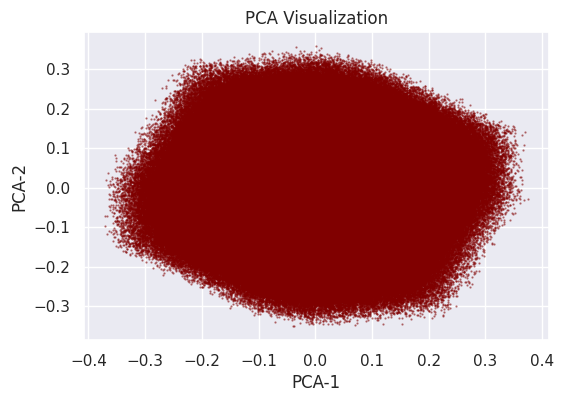

In [ ]:
pca = PCA(n_components = 2, random_state = 7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)
plt.clf()
fig = plt.figure(figsize=(6,4))
plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()